## 02_neural_network_classification.ipynb

## regression => 결과가 어떤 값으로 귀결한다는 쪽
## classification => 어떤 편인지 판별하는 과정
## binary classification : 둘 중에 하나 선택!
## multi-class classification : 3개 이상의 선택지가 있을 때!
## multi-label classification : 어떤 신문기사 하나가 정치쪽일 수도 있고, 경제쪽일 수도 있고

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [3]:
type(X), X.shape, type(y), y.shape

(numpy.ndarray, (1000, 2), numpy.ndarray, (1000,))

In [4]:
X[:30]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905],
       [-0.64249042, -0.54409929],
       [ 0.5694666 ,  0.84476776],
       [-0.11773591,  0.83140071],
       [ 0.73410004, -0.33316553],
       [ 0.60077633, -0.58742632],
       [ 0.19022571, -0.76341003],
       [-0.93695185, -0.3434314 ],
       [ 0.1070617 , -0.7930922 ],
       [-0.81891362, -0.10162399],
       [-0.64210013, -0.74537441],
       [ 0.6268272 ,  0.45004698],
       [-0.56229136,  0.85375906],
       [-0.02126666, -0.99627531],
       [ 0.73977058,  0.27837025],
       [-0.90904839,  0.45724363],
       [-0.93699411,  0.19944235],
       [ 0.28661578,  0.97973871],
       [ 0.82626072, -0.15335757],
       [ 0.2534334 ,

In [5]:
y[:30]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [6]:
circles = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

## 위 결과를 볼 때 우리는 binary classification을 해결해야 한다!
## 0과 1만이 아니라 2, 3, 4 등등이 존재하면 multiclass classification입니다!

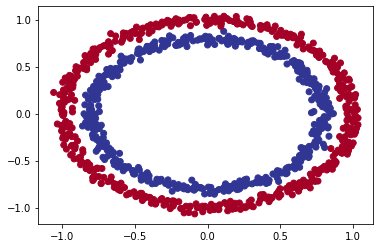

In [8]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu)

In [9]:
X.shape, y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## 우리가 만들 신경망은 2개 값을 가진 최소한 1차원 텐서이어야 하고 
## 최소한 1개 값을 가진 tensor로 결과값을 출력

In [11]:
# 1. model create
# 2. model compile
# 3. model fit

tf.random.set_seed(42)

# 1. 모델을 create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),  
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

# 3. 모델을 fit
history_model_1 = model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 573us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 739us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 651us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 591us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 868us/step - loss: 0.6942 - accuracy: 0.4820


In [12]:
model_1.fit(X, y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 0s 772us/step - loss: 0.6945 - accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 719us/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 546us/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 762us/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 643us/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 609us/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 839us/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 965us/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 803us/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 700us/step - loss: 0.6938 - accura

In [13]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 455us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [14]:
tf.random.set_seed(42)

# 1. 모델을 create
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),  
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

# 3. 모델을 fit
history_model_2 = model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 516us/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 668us/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 695us/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 611us/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 740us/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 730us/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 862us/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 579us/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 836us/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 739us/step - loss: 0.6962 - accura

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 571us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [16]:
tf.random.set_seed(42)

# 1. 모델을 create
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),  
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. 모델을 fit
history_model_3 = model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 761us/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 643us/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 804us/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 772us/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 739us/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 792us/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 868us/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 959us/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 900us/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 836us/step - loss: 0.6944 - accura

In [17]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 546us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [18]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1,
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha= 0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


doing binary classification


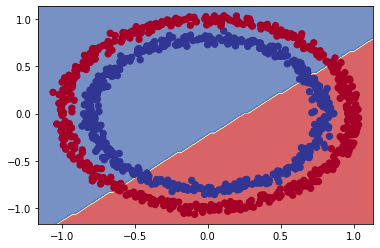

In [19]:
plot_decision_boundary(model_3, X, y)

## 우리의 데이터는 직선으로 구분할 수 없는 데이터인데...
## 현재 모델이 가진 기준선은 직선으로 되어 있다...

In [22]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [23]:
tf.random.set_seed(42)

# 1. 모델을 create
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_3.compile(
    loss = tf.keras.losses.mae,  
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. 모델을 fit
history_model_3 = model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 996us/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 746us/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 747us/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 997us/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 43.6830 - mae: 43.6830
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [=============================

In [24]:
y_reg_preds = model_3.predict(y_reg_test)

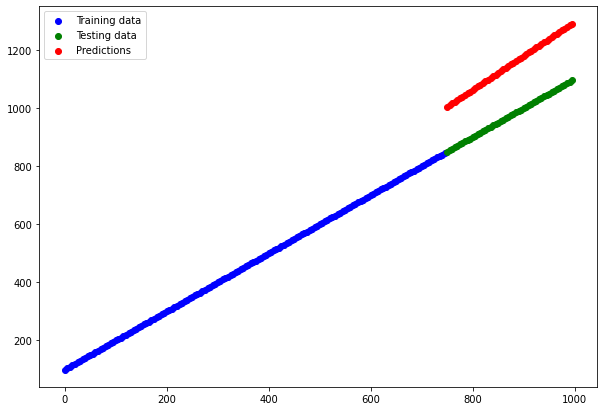

In [25]:
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Testing data")
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c = "r", label = "Predictions")
plt.legend()

## 우리에게 빠진 조각을 찾아야 한다! ==> Non-linearity (비선형이라는 성질을 반영시켜줘야 한다)

In [26]:
tf.random.set_seed(42)

# 1. 모델을 create
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_4.compile(
    loss = tf.keras.losses.binary_crossentropy,  
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# 3. 모델을 fit
history_model_4 = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 675us/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 804us/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 662us/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 611us/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 803us/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 748us/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 802us/step - loss: 3.3803 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 804us/step - loss: 3.2273 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 707us/step - loss: 2.8035 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 771us/step - loss: 2.5701 - accura

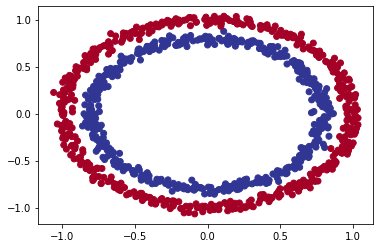

In [27]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

doing binary classification


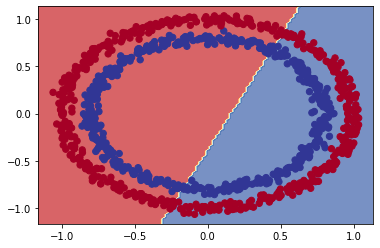

In [28]:
plot_decision_boundary(model_4, X, y)

In [ ]:
plot_decision_boundary(model_3, X, y)

In [46]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 550us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [30]:
tf.random.set_seed(42)

# 1. 모델을 create
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_5.compile(
    loss = tf.keras.losses.binary_crossentropy,  
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# 3. 모델을 fit
history_model_5 = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 611us/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 764us/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 702us/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 611us/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 775us/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 905us/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 693us/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 836us/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 720us/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 779us/step - loss: 1.0407 - accura

doing binary classification


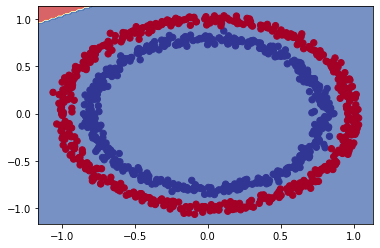

In [31]:
plot_decision_boundary(model_5, X, y)

In [35]:
tf.random.set_seed(42)

# 1. 모델을 create
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_6.compile(
    loss = tf.keras.losses.binary_crossentropy,  
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# 3. 모델을 fit
history_model_6 = model_6.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 804us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 707us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 579us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 804us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 901us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 836us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 739us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 853us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 732us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 772us/step - loss: 7.7125 - accura

doing binary classification


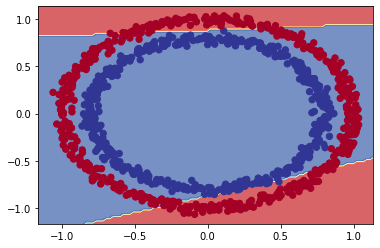

In [36]:
plot_decision_boundary(model_6, X, y)

In [37]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 465us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [38]:
tf.random.set_seed(42)

# 1. 모델을 create
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. 모델을 compile
model_7.compile(
    loss = tf.keras.losses.binary_crossentropy,  
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# 3. 모델을 fit
history_model_7 = model_7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 772us/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 845us/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 803us/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 752us/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 740us/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 692us/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 891us/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 836us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 675us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 830us/step - loss: 0.6766 - accura

In [39]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 598us/step - loss: 0.2948 - accuracy: 0.9910


[0.2948005199432373, 0.9909999966621399]

doing binary classification


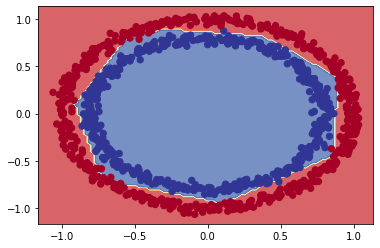

In [40]:
plot_decision_boundary(model_7, X, y)

In [41]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

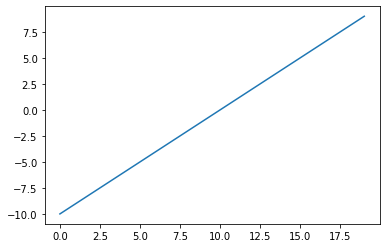

In [42]:
plt.plot(A)

In [43]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [44]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

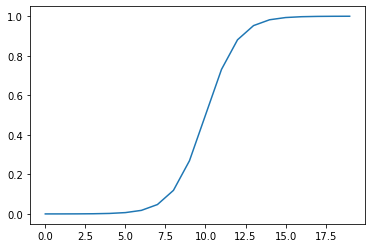

In [45]:
plt.plot(sigmoid(A))

In [46]:
def relu(x):
    return tf.maximum(0, x)

In [47]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

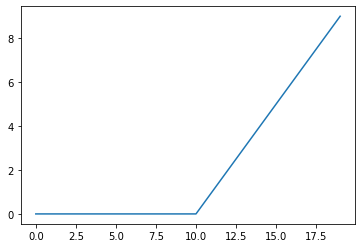

In [48]:
plt.plot(relu(A))

In [50]:
tf.keras.activations.linear(A), A

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>)

In [51]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## linear function : 입력값을 변경하지 않는다
## non-linear function : 입력값을 변경한다.
## neural network (신경망)은 입력과 출력 사이의 패턴을 찾기 위해서 대량으로 이런 변환을 수행합니다.

In [54]:
len(X), len(y)

(1000, 1000)

In [53]:
X_train, y_train = X[:800], y[:800] # 전체 데이터의 80%
X_test, y_test = X[800:], y[800:]  # 전체 데이터의 20%

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [60]:
tf.random.set_seed(42)

# 1. 모델을 create
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. 모델을 compile
model_8.compile(
    loss = tf.keras.losses.binary_crossentropy,  
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

# 3. 모델을 fit
history_model_8 = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 970us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 969us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 853us/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 745us/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 581us/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 848us/step - loss: 0.5714 - accuracy: 0.7738
Epoch 1

In [61]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"테스트 데이터셋에 대한 모델의 loss는 {loss}")
print(f"테스트 데이터셋에 대한 모델의 accuracy는 {100 * accuracy : .2f}")

7/7 [==============================] - 0s 902us/step - loss: 0.1247 - accuracy: 1.0000
테스트 데이터셋에 대한 모델의 loss는 0.12468847632408142
테스트 데이터셋에 대한 모델의 accuracy는  100.00


doing binary classification
doing binary classification


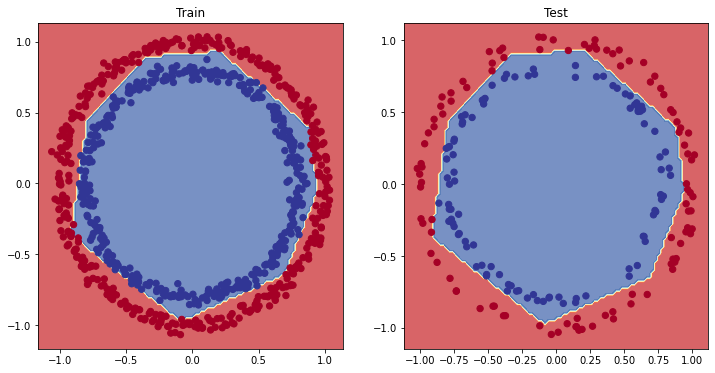

In [62]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()